# ML Assignment – HR CHURN PREDICTION

**Case study:**  
There is an ever increase in focus of effective requirement. An organization invest a lot of time and resources in search of potential candidates. The investment become loses if the selected candidate do not join organization in the end.  
**Challenges:**  
➢ Recruiter need to understand the chances of candidate of joining the
organization.  
➢ There are numerous factors for which the candidate can backout of the job.  
➢ Confidential data cannot be obtained.

### The variables collected were as follows:
    1. Candidate reference number:
    Unique number to identify the candidate
    2. DOJ extended:
    Binary variable identifying whether candidate asked for date of joining extension
    (Yes/No)
    3. Duration to accept the offer:
    Number of days taken by the candidate to accept the offer (continuous variable)
    4. Notice period:
    Notice period to be served in the parting company before candidate can join this
    company (continuous variable)
    5. Offered band:
    Band offered to the candidate based on experience and performance in interview
    rounds (categorical variable labelled C0/C1/C2)
    6. Percentage hike expected:
    Percentage hike expected by the candidate (continuous variable)
    7. Percentage hike offered
    Percentage hike offered by the company (continuous variable)
    8. Percentage difference
    Difference of hike offered and hike expected is considered
    9. Joining bonus
    Binary variable indicating if joining bonus was given or not (Yes/No)
    10. Gender
    Gender of the candidate (Male/Female)
    11. Candidate source
    Source from which resume of the candidate was obtained (categorical variables
    with categories: Employee referral/Agency/Direct)
    12. Year of experience (in years)
    Relevant years of experience of the candidate for the position offered (continuous
    variable)
    13. LOB
    Line of business for which offer was rolled out (categorical variable)
    14. DOB
    Date of birth of the candidate
    15. Joining location
    Company location for which offer was rolled out for candidate to join (categorical
    variable)
    16. Candidate relocation status
    Binary variable indicating whether candidate has to relocate from one city to
    another city for joining (Yes/No)
    17. HR status
    Final joining status of candidate (Joined/Not-Joined)



## Gathering Imports

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Loading our Data

In [187]:
df = pd.read_csv('HR_Data.csv')
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [188]:
df.shape

(8998, 18)

In [189]:
df.columns

Index(['SLNO', 'Candidate.Ref', 'DOJ.Extended', 'Duration.to.accept.offer',
       'Notice.period', 'Offered.band', 'Pecent.hike.expected.in.CTC',
       'Percent.hike.offered.in.CTC', 'Percent.difference.CTC',
       'Joining.Bonus', 'Candidate.relocate.actual', 'Gender',
       'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

### **Observations:**  
    1. Status column is our target feature  
    2. we have total of 8998 rows and 18 columns in our data  
    3. SLNO is same like our index column so we probably wont need that  
    4. Many column name are joined with a '.' if we replace it with '_' it will be helpful for us  



# Statistical Analysis

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8998 non-null   int64  
 1   Candidate.Ref                8998 non-null   int64  
 2   DOJ.Extended                 8998 non-null   object 
 3   Duration.to.accept.offer     8998 non-null   int64  
 4   Notice.period                8998 non-null   int64  
 5   Offered.band                 8998 non-null   object 
 6   Pecent.hike.expected.in.CTC  8998 non-null   float64
 7   Percent.hike.offered.in.CTC  8998 non-null   float64
 8   Percent.difference.CTC       8998 non-null   float64
 9   Joining.Bonus                8998 non-null   object 
 10  Candidate.relocate.actual    8998 non-null   object 
 11  Gender                       8998 non-null   object 
 12  Candidate.Source             8998 non-null   object 
 13  Rex.in.Yrs        

### **Observations:**  
    1. We have 9 numerical columns (including SLNO) and 9 categorical columns 
    2. No missing values in any column

In [191]:
df.describe()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
count,8998.000000,8.998000e+03,8998.000000,8998.000000,8998.000000,8998.00000,8998.000000,8998.000000,8998.000000
mean,5972.247722,2.843815e+06,21.428762,39.282063,43.877143,40.66886,-1.574809,4.239053,29.913647
std,3374.652978,4.864595e+05,25.809202,22.224471,29.826113,36.09506,19.607638,2.547685,4.097889
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.53000,-67.270000,0.000000,20.000000
25%,3208.250000,2.386508e+06,3.000000,30.000000,27.270000,22.09000,-8.330000,3.000000,27.000000
50%,5976.500000,2.807490e+06,10.000000,30.000000,40.000000,36.00000,0.000000,4.000000,29.000000
75%,8744.000000,3.300062e+06,33.000000,60.000000,53.850000,50.00000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.43000,300.000000,24.000000,60.000000


### **Observations:**  
    1. Candidate Reference column has some really high values.
    2. 75% of candidate accepts the offer withing 33 days but the maximum value in that column is 224, so it might be an outlier
    3. Max notice period is 120 days
    4. Average hike offered is 40% in CTC
    5. 75% candidates has no difference in CTC offered
    6. Average age of candidate is 29.

# EDA

In [192]:
# Separating numerical and categorical collumns
all_cols = df.columns
numerical_cols = df._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)- set(numerical_cols))
categorical_cols.remove('Status')

## Univariate Analysis

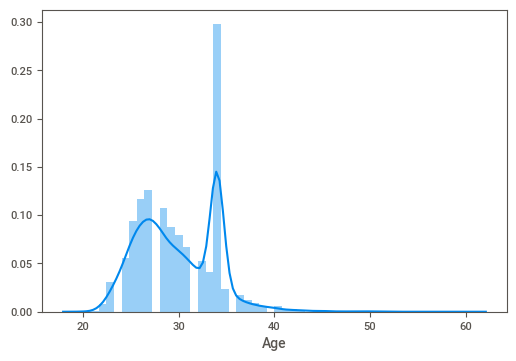

In [193]:
sns.distplot(df.Age);

Candidates are from age range of 22 to 38

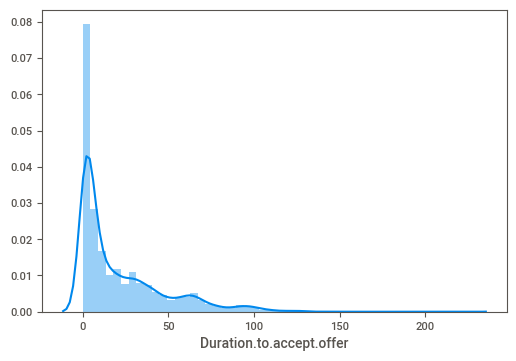

In [194]:
sns.distplot(df['Duration.to.accept.offer']);

Most of the candidates accept immediately

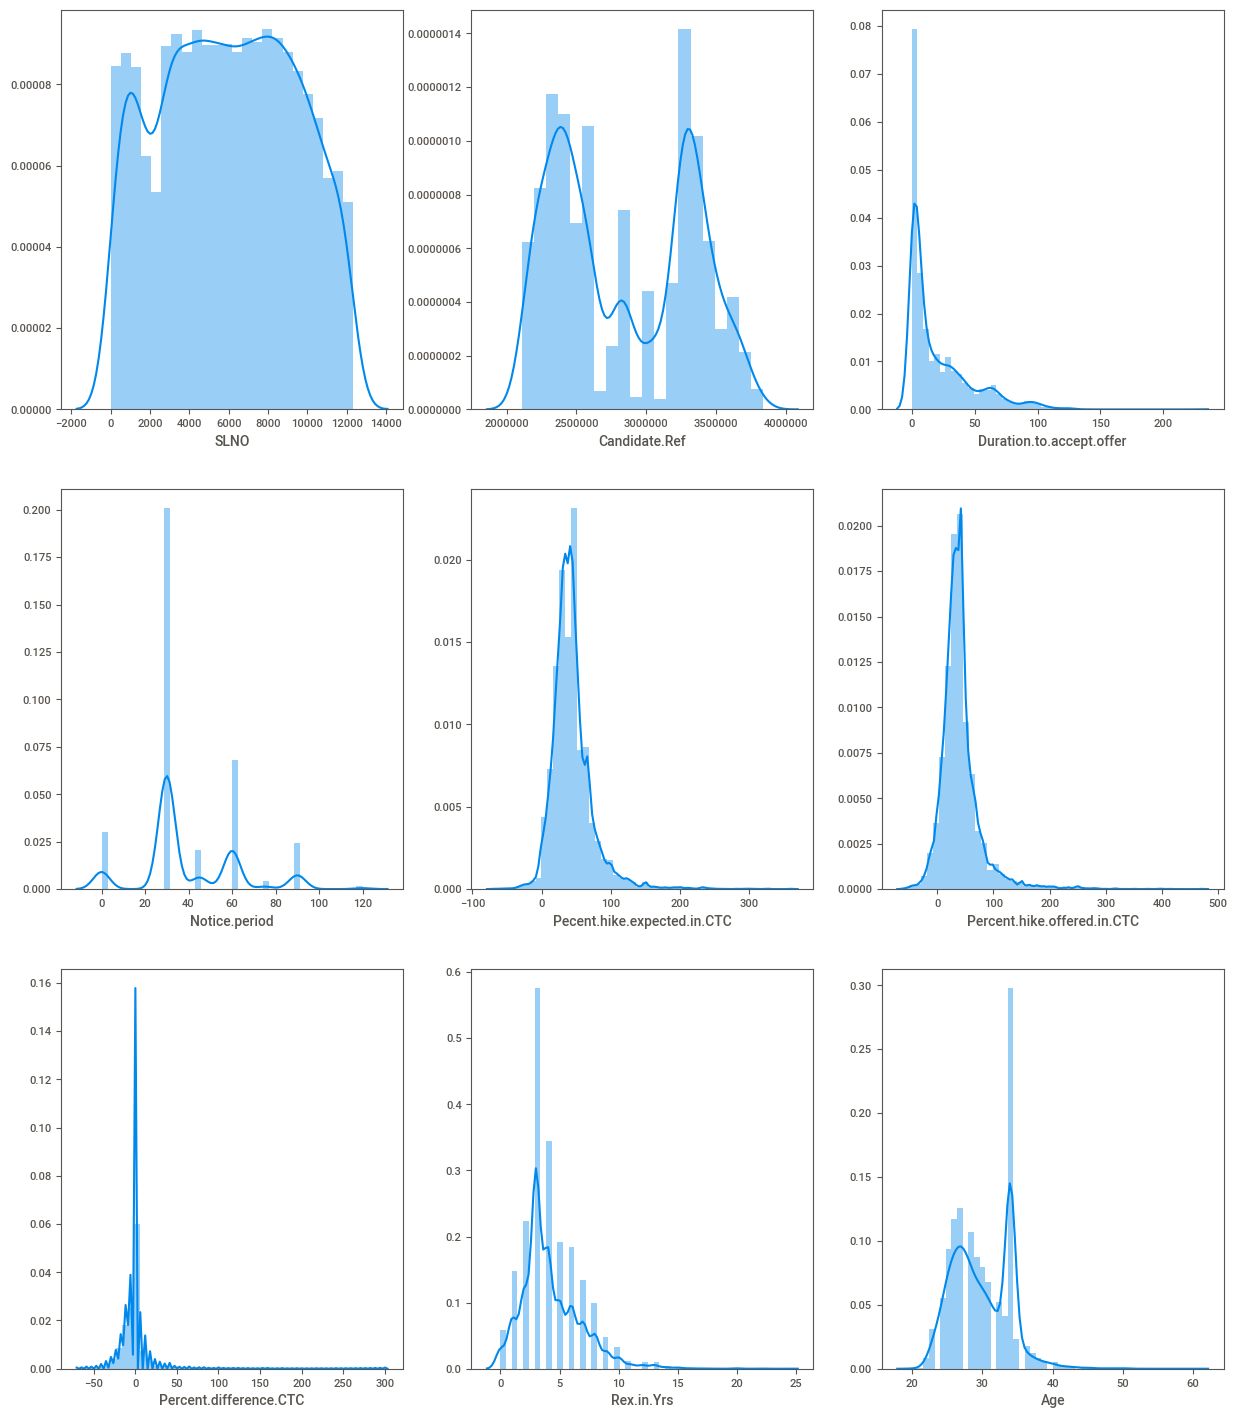

In [195]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 18))

for ax, col in list(zip(axes.flat, numerical_cols)):       
        sns.distplot(df[col], ax=ax)

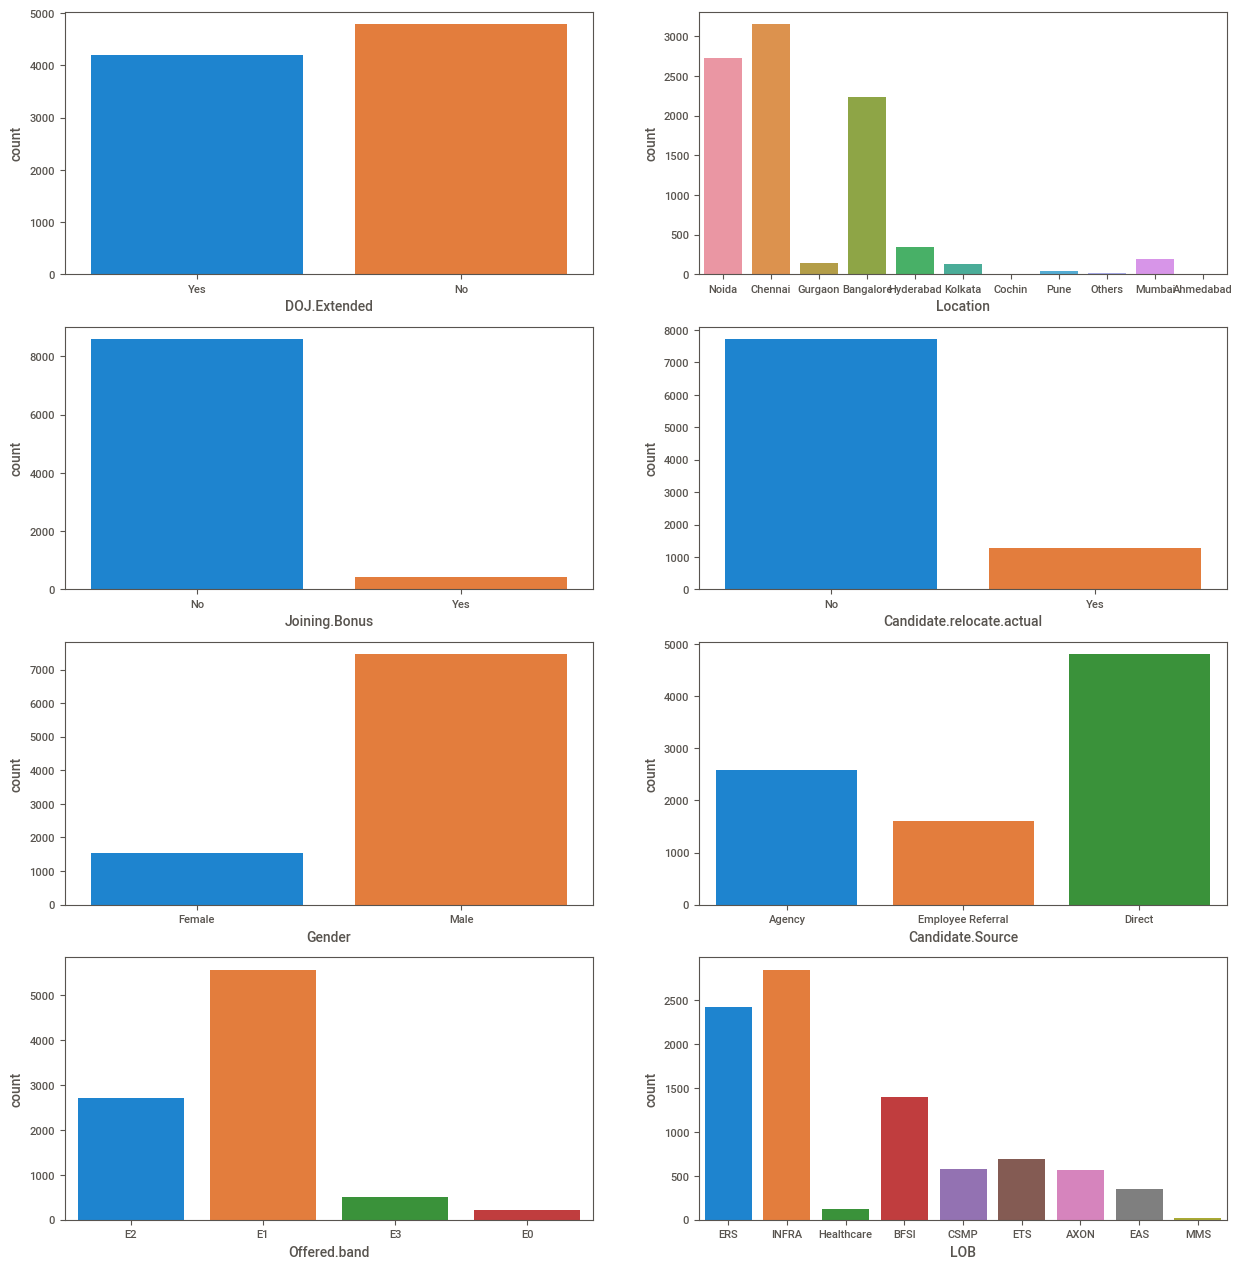

In [196]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 16))

for ax, col in list(zip(axes.flat, categorical_cols)):        
    sns.countplot(df[col], ax=ax)

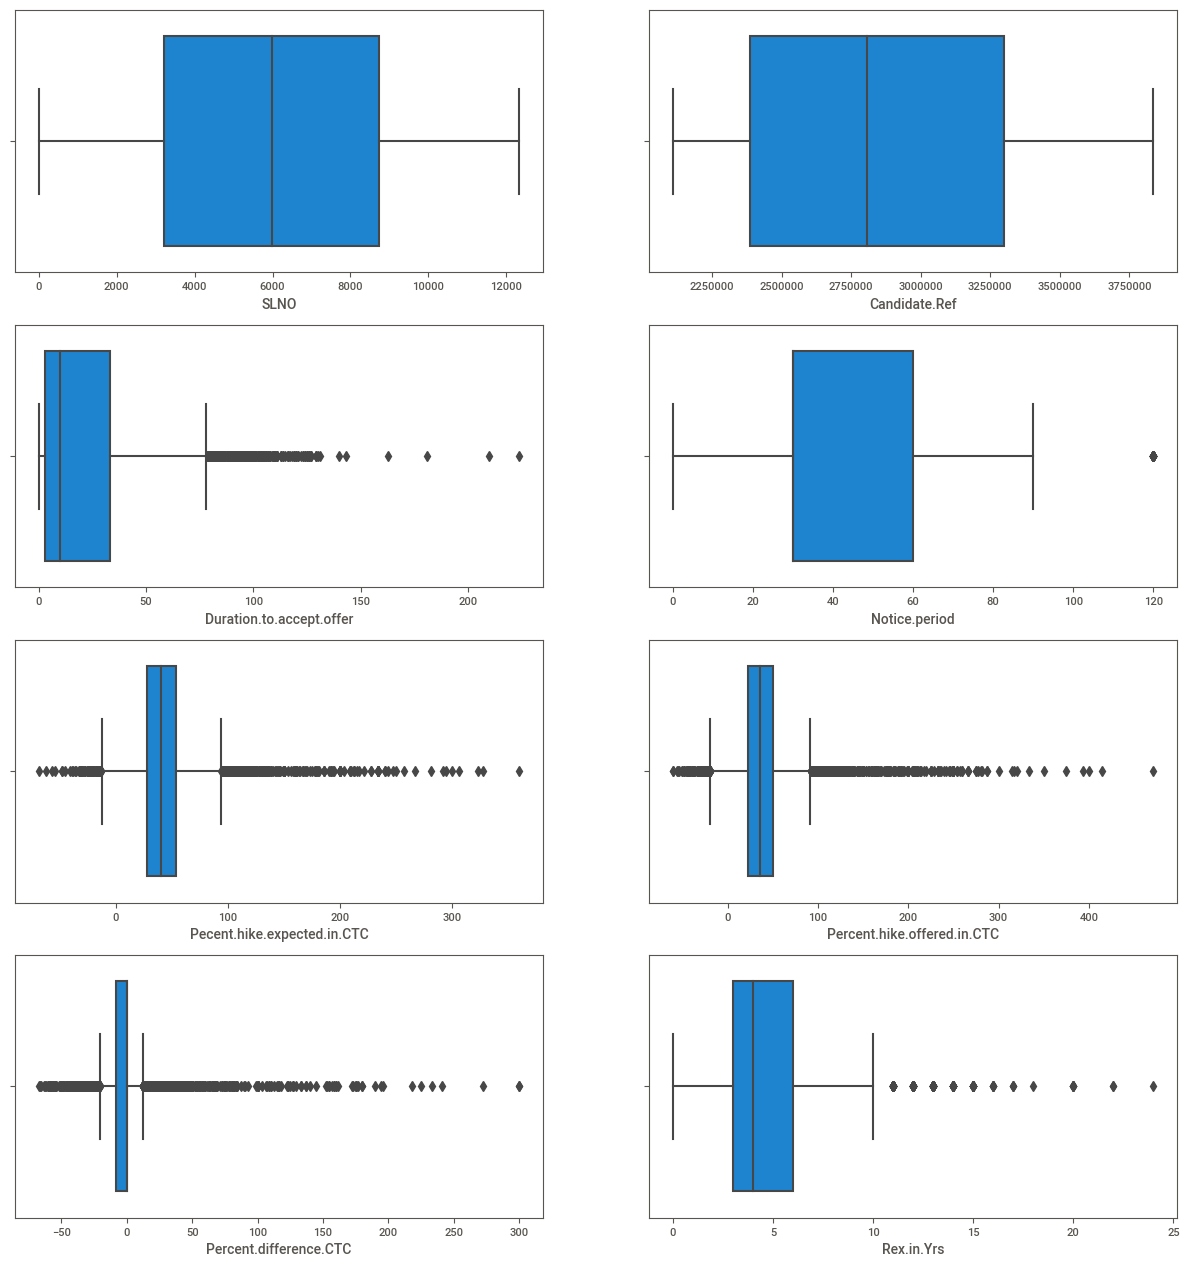

In [197]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 16))

for ax, col in list(zip(axes.flat, numerical_cols)):        
    sns.boxplot(df[col], ax=ax)

### Observations: Outliers in following columns
    1. Notice period
    2. Rex in yrs 
    3. Duration to accept offers
    4. and quite a lot in other percentage ctc columns

## Bivariate Analysis

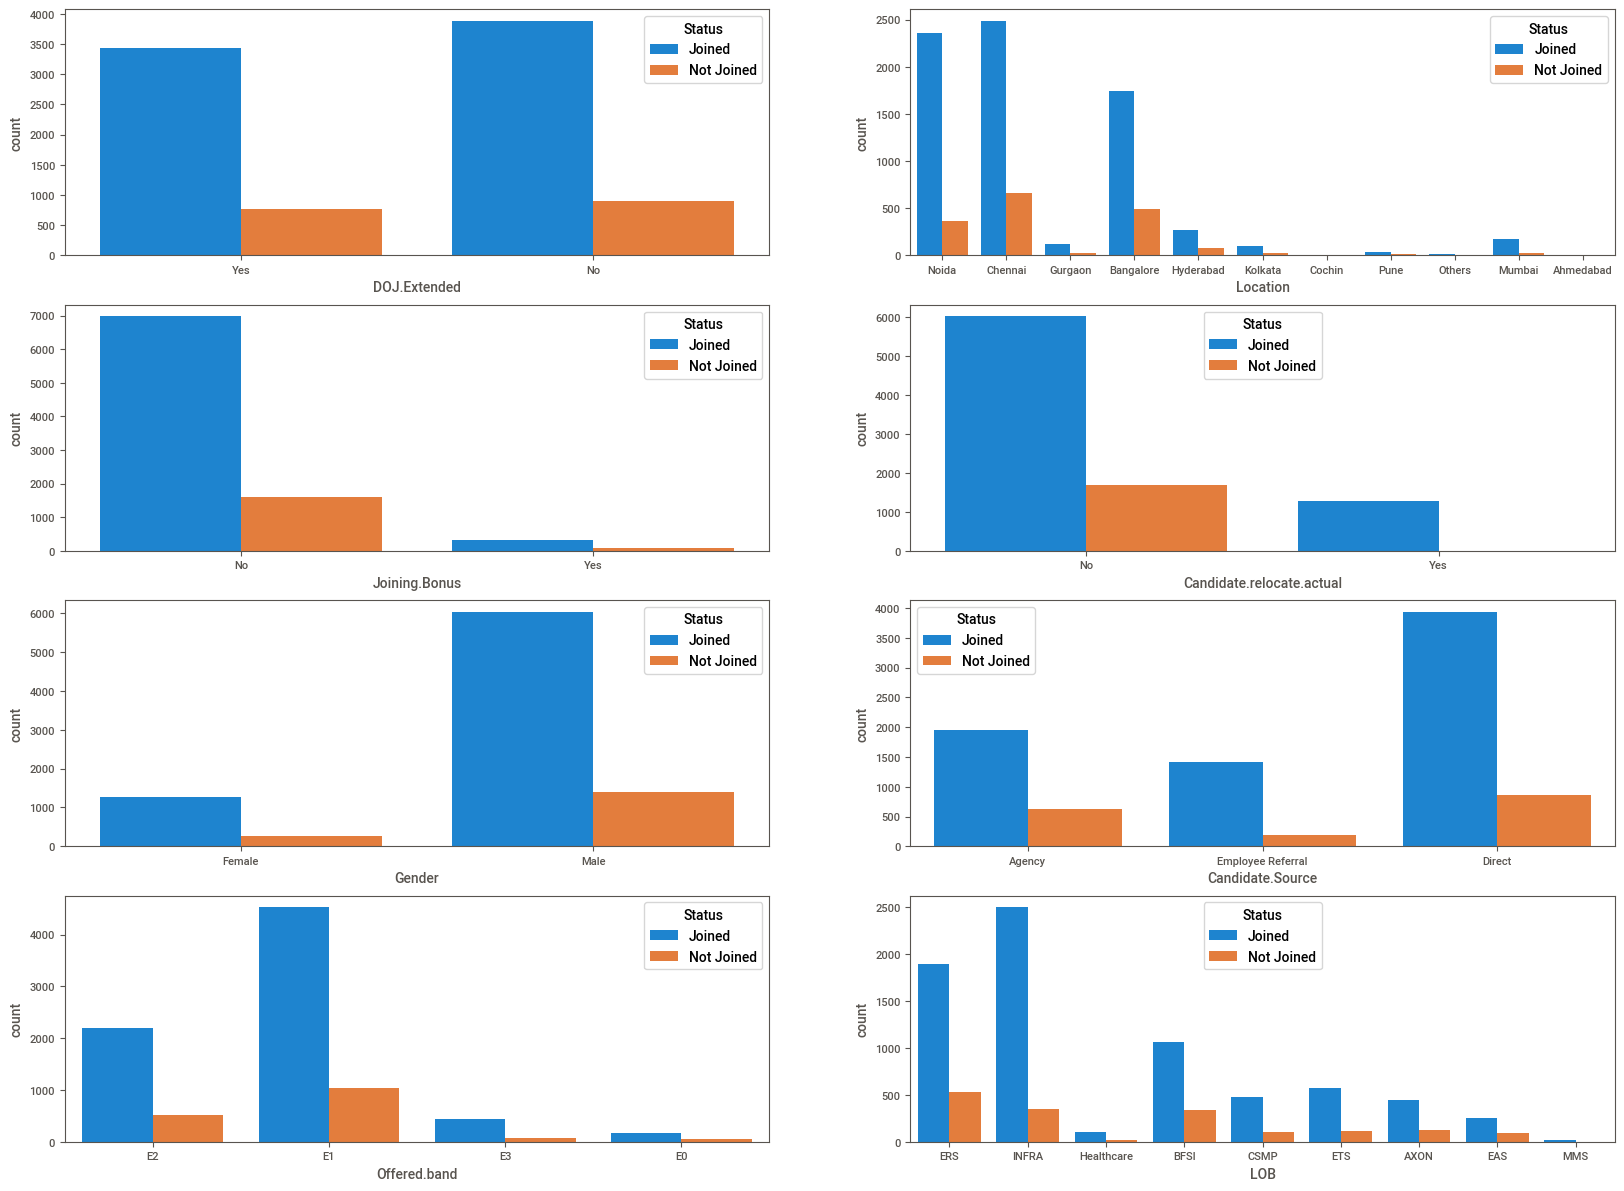

In [198]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

for ax, col in list(zip(axes.flat, categorical_cols)): 
    sns.countplot(df[col], hue=df['Status'], ax=ax)

### Observations: 
    1. Most number of people joined are in INFRA and ERS
    2. Most people who were offered E1 band have joined
    3. Male and female have same number so there seems no differece
    4. Candidate who actually relocate joins.
    5. Chennai has most number of candidates join as well as not joined.
    6. If candidate comes from employee referral there is low chance of churning

### Correlation

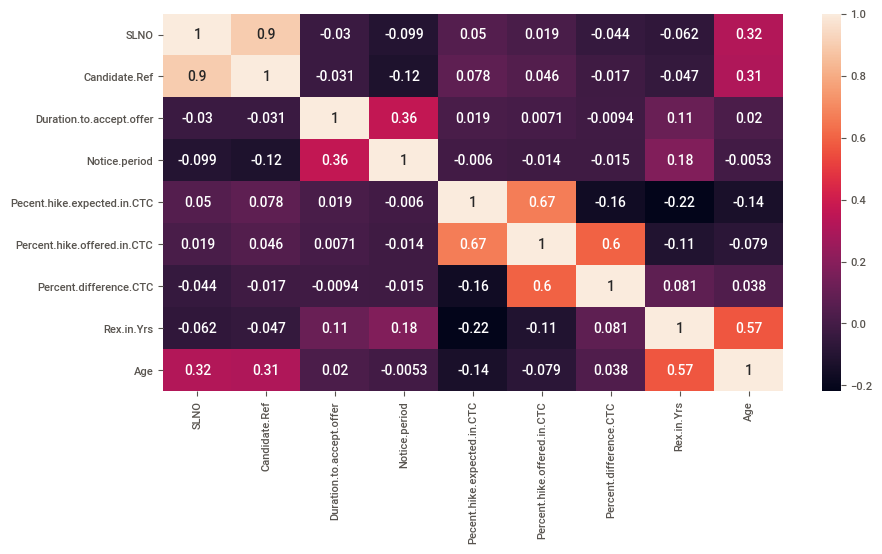

In [199]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True);

# Data Cleaning

In [200]:
df_cleaned = df.copy(deep=True)

In [201]:
df_cleaned.columns = df.columns.str.replace('.', '_') # replacing . by _ 

In [202]:
df_cleaned.pop('SLNO')
df_cleaned.pop('Candidate_Ref')

0       2110407
1       2112635
2       2112838
3       2115021
4       2115125
         ...   
8993    3835433
8994    3836076
8995    3822427
8996    3664089
8997    2556130
Name: Candidate_Ref, Length: 8998, dtype: int64

In [203]:
df_cleaned.drop(df_cleaned[df_cleaned['Notice_period']>100].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Rex_in_Yrs']>11].index,inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Duration_to_accept_offer']>135].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Pecent_hike_expected_in_CTC']>250].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Percent_hike_offered_in_CTC']>355].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Percent_difference_CTC']>200].index, inplace=True)

In [204]:
df_cleaned.head()

,DOJ_Extended,Duration_to_accept_offer,Notice_period,Offered_band,Pecent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
5,Yes,17,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,INFRA,Noida,34,Joined


# Data Preprocessing

In [205]:
# Separating numerical and categorical collumns
all_cols = df_cleaned.columns
numerical_cols = df_cleaned._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)- set(numerical_cols))

## Standard Scaler

In [206]:
sc = StandardScaler()
df_cleaned[numerical_cols] = sc.fit_transform(df_cleaned[numerical_cols])

One Hot encoding

In [224]:
le = LabelEncoder()
df_cleaned['Status'] = le.fit_transform(df_cleaned['Status'])
df_cleaned['Joining_Bonus'] = le.fit_transform(df_cleaned['Joining_Bonus'])
df_cleaned['Candidate_relocate_actual'] = le.fit_transform(df_cleaned['Candidate_relocate_actual'])
df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])
df_cleaned['Candidate_Source'] = le.fit_transform(df_cleaned['Candidate_Source'])
df_cleaned['LOB'] = le.fit_transform(df_cleaned['LOB'])
df_cleaned['Location'] = le.fit_transform(df_cleaned['Location'])
df_cleaned['DOJ_Extended'] = le.fit_transform(df_cleaned['DOJ_Extended'])
df_cleaned['Offered_band'] = le.fit_transform(df_cleaned['Offered_band'])

In [226]:
df_cleaned.head()

,DOJ_Extended,Duration_to_accept_offer,Notice_period,Offered_band,Pecent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,LOB,Location,Age,Status
0,1,-0.282029,-0.410485,2,-2.270100,-0.801363,2.482401,0,0,0,0,1.297883,4,8,1.060723,0
1,0,-0.123540,-0.410485,2,0.212422,8.207313,10.100461,0,0,1,2,1.742702,7,2,1.060723,0
2,0,-0.717873,0.286309,2,-0.038671,0.070028,0.101548,0,0,1,0,-0.036575,7,8,-0.701547,0
3,0,0.193438,-0.410485,2,-0.038671,0.070028,0.101548,0,0,1,2,-0.036575,7,8,1.060723,0
5,1,-0.163162,-0.410485,1,-0.039022,0.069734,0.101548,0,0,1,2,-0.926214,7,8,1.060723,0


# Model Building

In [227]:
y = df_cleaned.pop('Status')
X = df_cleaned

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [238]:
def Classify(clf):
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print('Accuracy: ',accuracy_score(y_test, preds))
    print('Classification Report: \n ',classification_report(y_test, preds))
    print('Confusion Matrix \n', confusion_matrix(y_test, preds))

## Logistic Regression

In [239]:
lr = LogisticRegression()
Classify(lr)

Accuracy:  0.8194633924511141
Classification Report: 
                precision    recall  f1-score   support

           0       0.83      0.99      0.90      1800
           1       0.52      0.06      0.10       399

    accuracy                           0.82      2199
   macro avg       0.67      0.52      0.50      2199
weighted avg       0.77      0.82      0.76      2199

Confusion Matrix 
 [[1779   21]
 [ 376   23]]


## Decision Tree Classifier

In [240]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
Classify(dt)

Accuracy:  0.7371532514779445
Classification Report: 
                precision    recall  f1-score   support

           0       0.85      0.82      0.84      1800
           1       0.31      0.35      0.33       399

    accuracy                           0.74      2199
   macro avg       0.58      0.59      0.58      2199
weighted avg       0.75      0.74      0.74      2199

Confusion Matrix 
 [[1480  320]
 [ 258  141]]


## Random Forest Classifier

In [241]:
from sklearn.ensemble import RandomForestClassifier
rfe = RandomForestClassifier(n_estimators = 20)
Classify(rfe)

Accuracy:  0.8208276489313324
Classification Report: 
                precision    recall  f1-score   support

           0       0.84      0.97      0.90      1800
           1       0.52      0.16      0.24       399

    accuracy                           0.82      2199
   macro avg       0.68      0.56      0.57      2199
weighted avg       0.78      0.82      0.78      2199

Confusion Matrix 
 [[1742   58]
 [ 336   63]]


## AdaBoost Classifier

In [242]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
Classify(adab)

Accuracy:  0.8221919054115507
Classification Report: 
                precision    recall  f1-score   support

           0       0.83      0.98      0.90      1800
           1       0.55      0.11      0.18       399

    accuracy                           0.82      2199
   macro avg       0.69      0.54      0.54      2199
weighted avg       0.78      0.82      0.77      2199

Confusion Matrix 
 [[1766   34]
 [ 357   42]]


AdaBoost seems to have Lowest number of False negatives

## Trying With Feature Importance

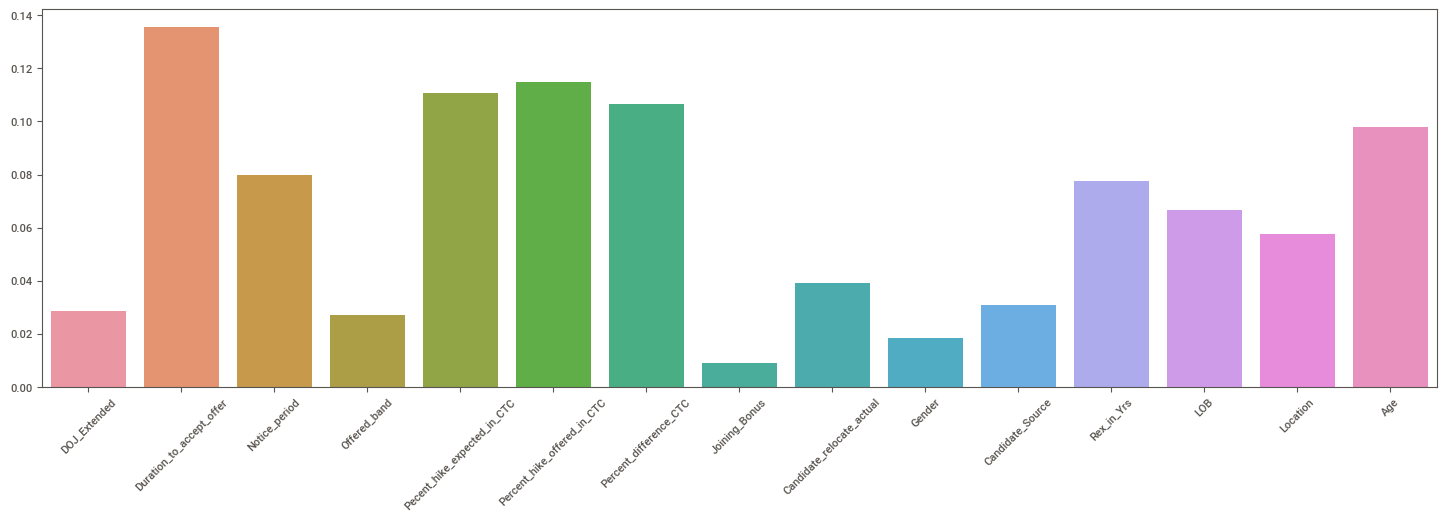

In [255]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
plt.figure(figsize=(18,5))
sns.barplot(x=df_cleaned.columns, y=model.feature_importances_);
plt.xticks(rotation=45);

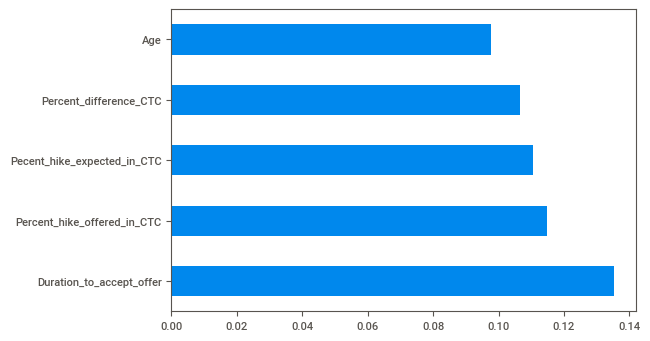

In [258]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.nlargest(5).plot(kind='barh');

In [260]:
df_cleaned.columns

Index(['DOJ_Extended', 'Duration_to_accept_offer', 'Notice_period',
       'Offered_band', 'Pecent_hike_expected_in_CTC',
       'Percent_hike_offered_in_CTC', 'Percent_difference_CTC',
       'Joining_Bonus', 'Candidate_relocate_actual', 'Gender',
       'Candidate_Source', 'Rex_in_Yrs', 'LOB', 'Location', 'Age'],
      dtype='object')

In [264]:
df_select_f = df_cleaned[['Age','Percent_difference_CTC','Pecent_hike_expected_in_CTC','Percent_hike_offered_in_CTC','Duration_to_accept_offer']]

In [266]:
X_selected_f = df_select_f
y_select_f = y

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_f, y_select_f, random_state=0)

In [268]:
from sklearn.ensemble import RandomForestClassifier
rfe = RandomForestClassifier(n_estimators = 20)
Classify(rfe)

Accuracy:  0.794906775807185
Classification Report: 
                precision    recall  f1-score   support

           0       0.82      0.95      0.88      1800
           1       0.27      0.08      0.12       399

    accuracy                           0.79      2199
   macro avg       0.55      0.52      0.50      2199
weighted avg       0.72      0.79      0.75      2199

Confusion Matrix 
 [[1717   83]
 [ 368   31]]


In [269]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
Classify(adab)

Accuracy:  0.8217371532514779
Classification Report: 
                precision    recall  f1-score   support

           0       0.82      1.00      0.90      1800
           1       0.68      0.03      0.06       399

    accuracy                           0.82      2199
   macro avg       0.75      0.51      0.48      2199
weighted avg       0.80      0.82      0.75      2199

Confusion Matrix 
 [[1794    6]
 [ 386   13]]
